In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/results.csv')
results.columns = ['server_id', 'service_id', 'client_id', 'prediction', 'compute_time', 'probability', 'qoe', 'acc_qoe', 'delay_qoe', 'req_acc', 'req_delay', 'model', 'timestamp', 'accuracy', 'ground_truth']

# Convert timestamp to datetime
results['timestamp'] = pd.to_datetime(results['timestamp'])
results

,server_id,service_id,client_id,prediction,compute_time,probability,qoe,acc_qoe,delay_qoe,req_acc,req_delay,model,timestamp,accuracy,ground_truth
0,d2iedgeai3,imagenet_image_classification,raspi-1,abaya,0.042057,0.711864,1.000000,1.000000,1.000000,0.849,0.050,550e8400-e29b-41d4-a716-446655440003,2024-09-29 17:53:42.998,1,abaya
1,d2iedgeai3,imagenet_image_classification,raspi-1,academic_gown,0.033164,0.416375,1.000000,1.000000,1.000000,0.850,0.052,550e8400-e29b-41d4-a716-446655440003,2024-09-29 17:53:43.036,1,academic_gown
2,d2iedgeai3,imagenet_image_classification,raspi-1,altar,0.041233,0.249539,1.000000,1.000000,1.000000,0.851,0.050,550e8400-e29b-41d4-a716-446655440003,2024-09-29 17:53:43.083,0,accordion
3,d2iedgeai3,imagenet_image_classification,raspi-1,acorn,0.039355,0.995296,0.926506,0.853013,1.000000,0.849,0.050,550e8400-e29b-41d4-a716-446655440003,2024-09-29 17:53:43.127,1,acorn
4,d2iedgeai3,imagenet_image_classification,raspi-1,acorn_squash,0.036026,0.920068,0.961379,0.922758,1.000000,0.849,0.050,550e8400-e29b-41d4-a716-446655440003,2024-09-29 17:53:43.169,1,acorn_squash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d2iedgeai3,imagenet_image_classification,raspi-5,barber_chair,0.067738,0.897447,0.741522,0.892532,0.590512,0.801,0.040,550e8400-e29b-41d4-a716-446655440004,2024-09-29 18:02:33.774,1,barber_chair
3495,d2iedgeai3,imagenet_image_classification,raspi-5,barbershop,0.069423,0.999150,0.689430,0.802683,0.576178,0.802,0.040,550e8400-e29b-41d4-a716-446655440004,2024-09-29 18:02:33.849,1,barbershop
3496,d2iedgeai3,imagenet_image_classification,raspi-5,barn,0.067613,0.999952,0.695320,0.799038,0.591601,0.799,0.040,550e8400-e29b-41d4-a716-446655440004,2024-09-29 18:02:33.922,1,barn
3497,d2iedgeai3,imagenet_image_classification,raspi-5,barn_spider,0.063542,0.984455,0.721068,0.812632,0.629504,0.800,0.040,550e8400-e29b-41d4-a716-446655440004,2024-09-29 18:02:33.992,1,barn_spider


In [6]:
power = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/power.csv')
power.columns = ['timestamp', 'container_power', 'container_cpu_usage', 'container_memory_usage', 'cpu_power', 'gpu_power', 'tot_power']

# Convert timestamp to datetime
power['timestamp'] = pd.to_datetime(power['timestamp'])
power

,timestamp,container_power,container_cpu_usage,container_memory_usage,cpu_power,gpu_power,tot_power
0,2024-09-28 20:19:18,127458.00,97.00,223241830,1314,123,3204
1,2024-09-28 20:19:22,50970.01,49.63,357249843,1027,246,2958
2,2024-09-28 20:19:27,114321.50,99.41,476472934,1150,41,2880
3,2024-09-28 20:19:32,138760.65,71.05,477102080,1953,40,3709
4,2024-09-28 20:19:37,109211.76,55.92,761790464,1953,81,3785
...,...,...,...,...,...,...,...
13480,2024-09-29 13:48:40,14354.78,18.38,469028044,781,41,2390
13481,2024-09-29 13:48:45,51684.40,62.80,559415296,823,41,2469
13482,2024-09-29 13:48:49,237.39,0.41,563399884,579,0,2111
13483,2024-09-29 13:48:54,334.66,0.58,561512448,577,206,2435


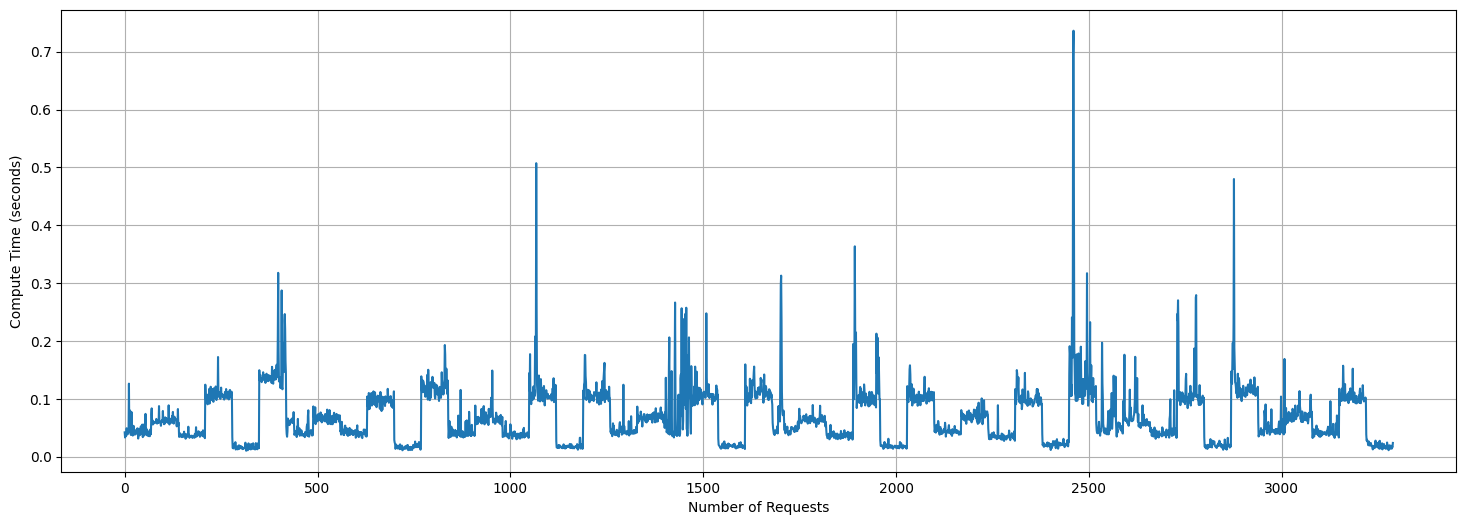

In [29]:
plt.figure(figsize=(18, 6))
plt.plot(results['compute_time'])
plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (seconds)')
plt.grid(True)
plt.show()

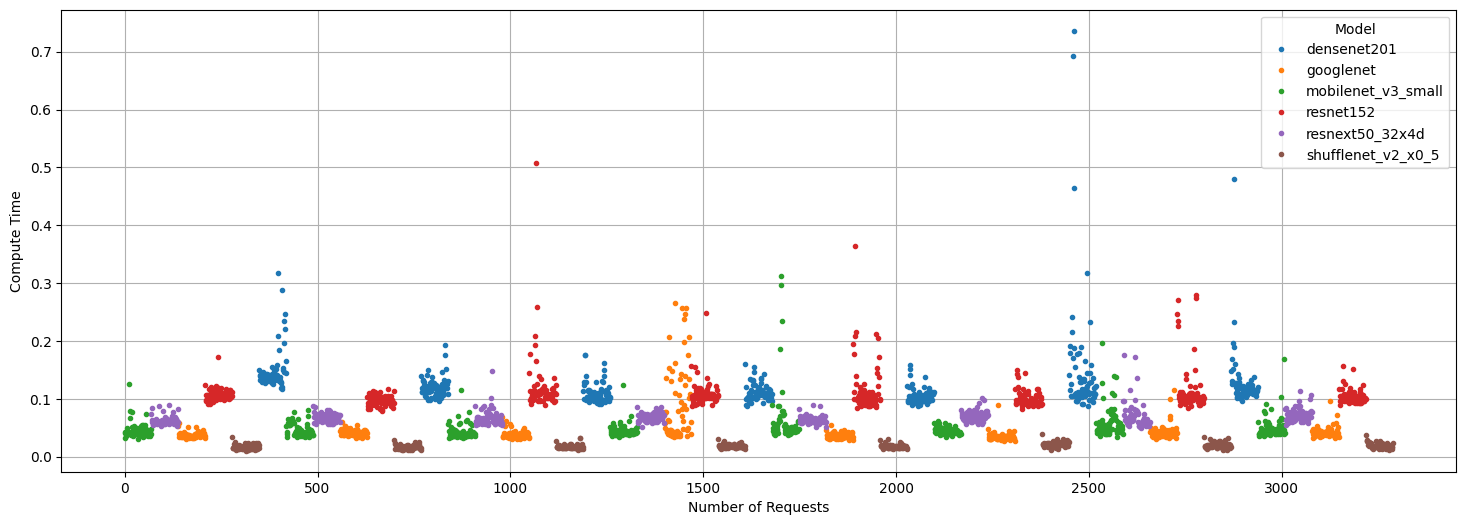

In [30]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time')

plt.grid(True)
plt.legend(title='Model')
plt.show()

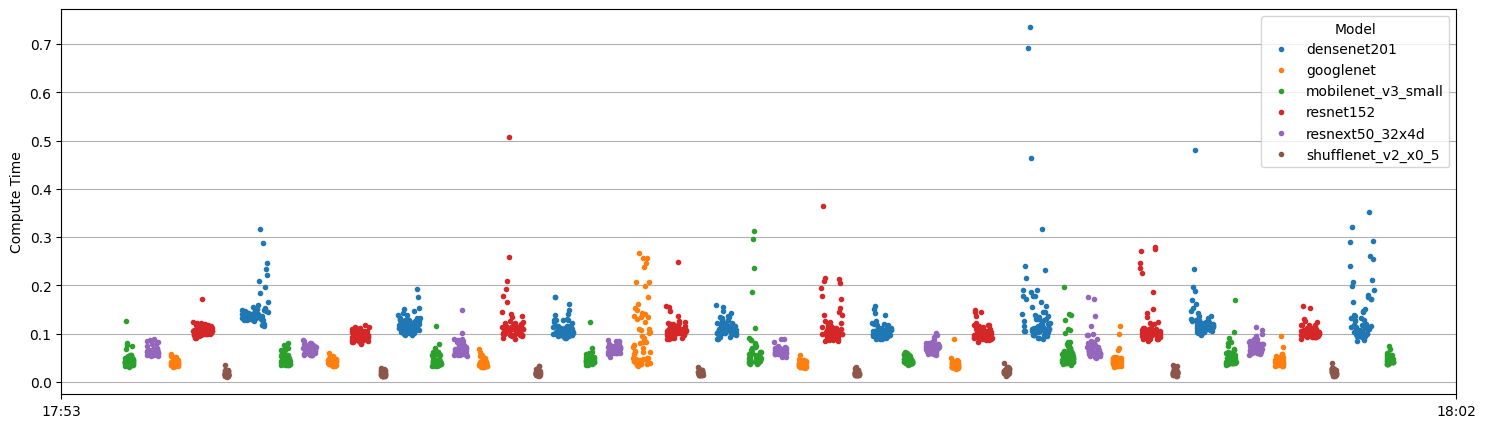

In [34]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 5))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['timestamp'], group['compute_time'], marker='.', linestyle='', label=model)

plt.ylabel('Compute Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.grid(True)
plt.legend(title='Model')
plt.show()

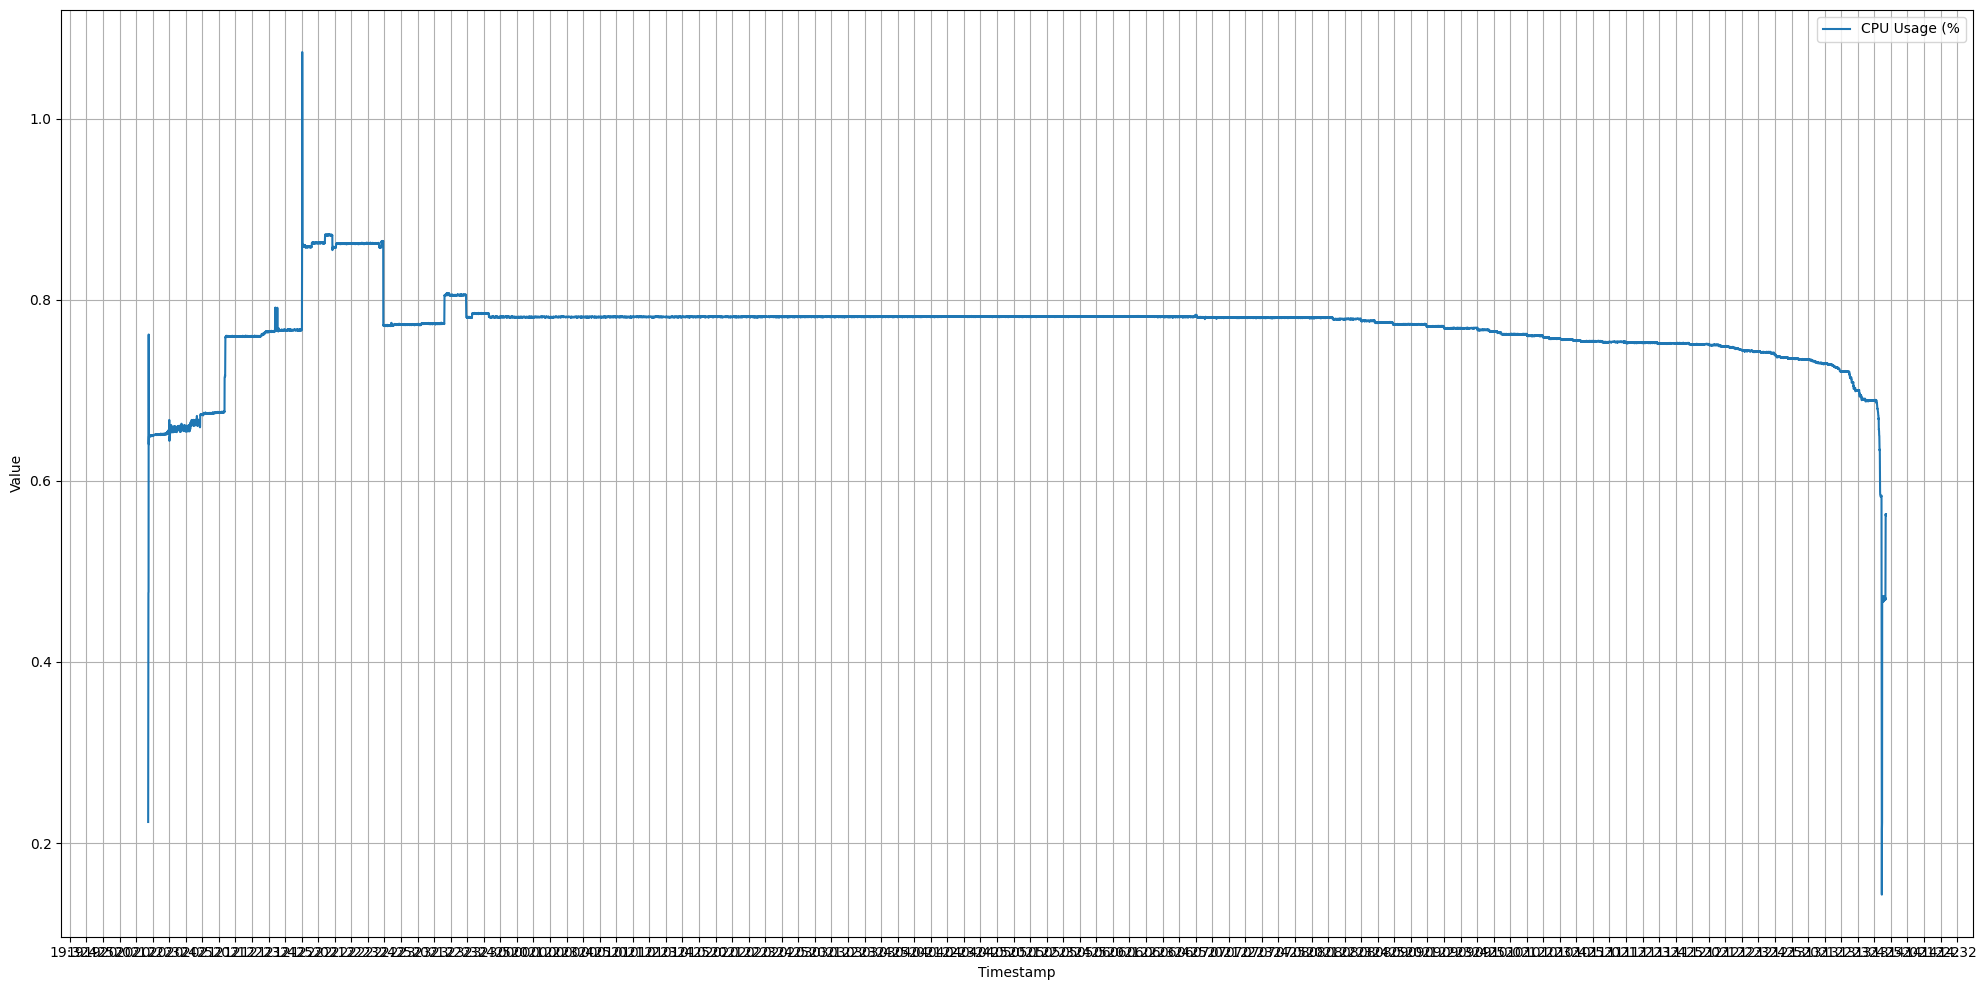

In [8]:
# Plot the data
plt.style.use('default')
plt.figure(figsize=(20, 10), facecolor='white')
# plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'], power['container_memory_usage']/1e9, label='CPU Usage (%')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()

In [35]:
results.groupby('model')['accuracy'].mean()

model
densenet201           0.914286
googlenet             0.657143
mobilenet_v3_small    0.828151
resnet152             0.885714
resnext50_32x4d       0.942857
shufflenet_v2_x0_5    0.685714
Name: accuracy, dtype: float64